In [17]:
import pandas as pd

In [18]:
df = pd.read_csv(r'/Users/renchulaji/Desktop/Data Science/Project/beer-servings.csv')

In [36]:
df.head(), df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 9.2+ KB


(       country  beer_servings  spirit_servings  wine_servings  \
 0  Afghanistan            0.0              0.0            0.0   
 1      Albania           89.0            132.0           54.0   
 2      Algeria           25.0              0.0           14.0   
 3      Andorra          245.0            138.0          312.0   
 4       Angola          217.0             57.0           45.0   
 
    total_litres_of_pure_alcohol continent  
 0                           0.0      Asia  
 1                           4.9    Europe  
 2                           0.7    Africa  
 3                          12.4    Europe  
 4                           5.9    Africa  ,
 None,
        beer_servings  spirit_servings  wine_servings  \
 count     185.000000       185.000000     187.000000   
 mean      105.124324        83.221622      50.165775   
 std       100.524714        89.142958      80.358868   
 min         0.000000         0.000000       0.000000   
 25%        20.000000         4.000000 

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df.fillna(0, inplace=True)

In [40]:
sns.set(style="whitegrid")

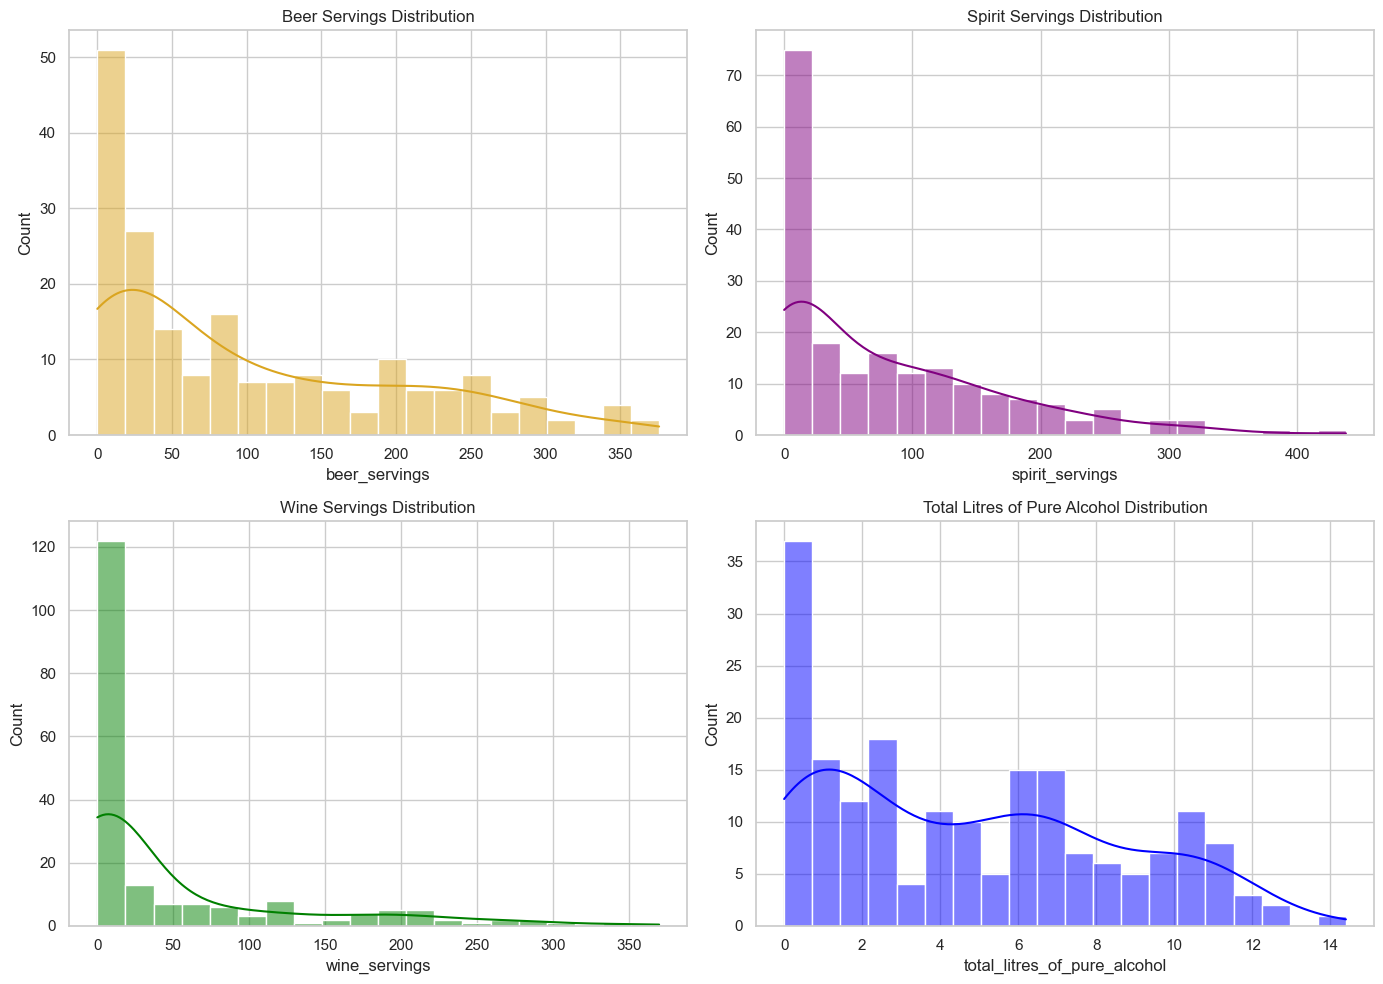

In [44]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df['beer_servings'], bins=20, kde=True, ax=axs[0, 0], color='goldenrod')
axs[0, 0].set_title('Beer Servings Distribution')

sns.histplot(df['spirit_servings'], bins=20, kde=True, ax=axs[0, 1], color='purple')
axs[0, 1].set_title('Spirit Servings Distribution')

sns.histplot(df['wine_servings'], bins=20, kde=True, ax=axs[1, 0], color='green')
axs[1, 0].set_title('Wine Servings Distribution')

sns.histplot(df['total_litres_of_pure_alcohol'], bins=20, kde=True, ax=axs[1, 1], color='blue')
axs[1, 1].set_title('Total Litres of Pure Alcohol Distribution')

plt.tight_layout()
plt.show()

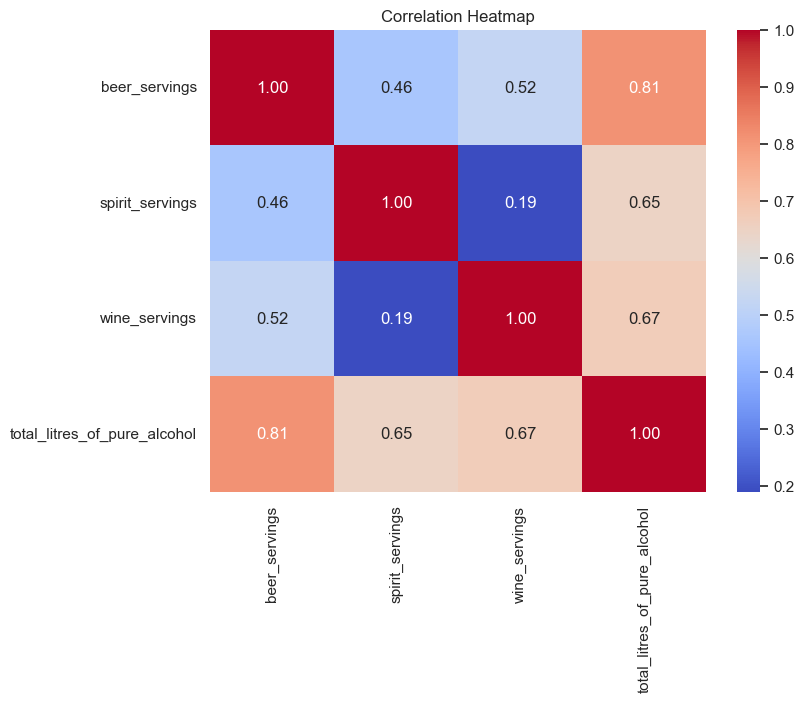

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [47]:
X = df[['country', 'continent', 'beer_servings', 'spirit_servings', 'wine_servings']]
y = df['total_litres_of_pure_alcohol']

In [48]:
cat_features = ['country', 'continent']
num_features = ['beer_servings', 'spirit_servings', 'wine_servings']

In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough'  # Keep numerical features as is
)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
lr_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

In [52]:
rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [53]:
lr_pipeline.fit(X_train, y_train)
lr_preds = lr_pipeline.predict(X_test)
lr_r2 = r2_score(y_test, lr_preds)

rf_pipeline.fit(X_train, y_train)
rf_preds = rf_pipeline.predict(X_test)
rf_r2 = r2_score(y_test, rf_preds)

In [54]:
print(f"Linear Regression R² Score: {lr_r2:.3f}")
print(f"Random Forest R² Score: {rf_r2:.3f}")

Linear Regression R² Score: 0.909
Random Forest R² Score: 0.821
